In [ ]:
#pip install python-socketio==4.4.0

In [ ]:
#pip install python-engineio==3.9

In [ ]:
#pip install -U fxcmpy==1.2.6

In [ ]:
#pip install mplfinance

In [1]:
# imports
import datetime as dt
from pylab import mpl, plt

import fxcmpy
import mplfinance as fplt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
%matplotlib notebook

In [3]:
TOKEN = "6bcb809cd84d12119c60208707f68be34de8cd39"
api = fxcmpy.fxcmpy(access_token=TOKEN, log_level="error")

In [4]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [5]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [6]:
start = dt.datetime(2018, 6, 25)
stop = dt.datetime(2018, 6, 30)

Get tick data for EUR-USD. Note that it gets downloads whole weeks of data. For smaller data sets you need to subset it.

In [7]:
td = tdr('EURUSD', start, stop)

In [8]:
td.get_data().head()

Bid      Ask
2018-06-24 21:00:12.290  1.1662  1.16660
2018-06-24 21:00:16.046  1.1662  1.16650
2018-06-24 21:00:22.846  1.1662  1.16658
2018-06-24 21:00:22.907  1.1662  1.16660
2018-06-24 21:00:23.441  1.1662  1.16663

In [9]:
td.get_data().tail()

Bid      Ask
2018-06-29 20:59:00.011  1.16815  1.16859
2018-06-29 20:59:00.279  1.16815  1.16860
2018-06-29 20:59:00.511  1.16816  1.16861
2018-06-29 20:59:00.584  1.16817  1.16862
2018-06-29 20:59:00.607  1.16816  1.16861

In [10]:
sub = td.get_data(start="2018-06-29 12:00:00",
                  end="2018-06-29 12:15:00")

In [11]:
sub.head()

Bid      Ask
2018-06-29 12:00:00.011  1.16497  1.16498
2018-06-29 12:00:00.071  1.16497  1.16497
2018-06-29 12:00:00.079  1.16497  1.16498
2018-06-29 12:00:00.091  1.16495  1.16498
2018-06-29 12:00:00.205  1.16496  1.16498

Calculate the average of the bid and ask price and the SMA and plot

In [12]:
sub['Mid'] = sub.mean(axis=1)
sub['SMA'] = sub['Mid'].rolling(1000).mean()

<IPython.core.display.Javascript object>


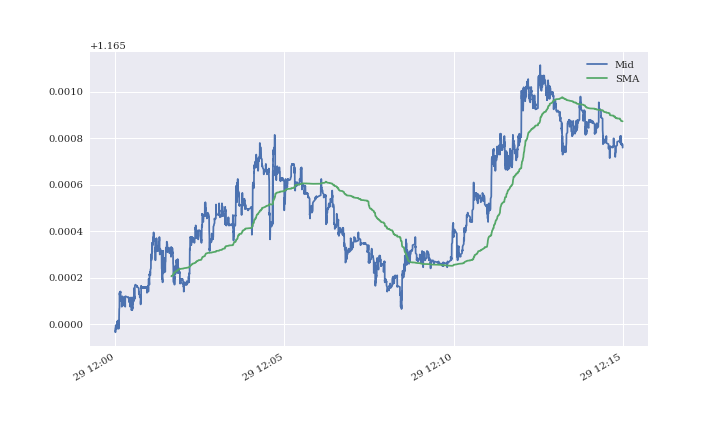

<AxesSubplot:>

In [13]:
sub[['Mid', 'SMA']].plot(figsize=(10, 6))

<h2> Candle Stick Data </h2>

In [17]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [18]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [19]:
start = dt.datetime(2018, 5, 1)
stop = dt.datetime(2018, 5, 30)

In [20]:
period = 'H1' # Hourly data. Change to m1 for minute, D1 for day etc.

In [21]:
candles = cdr('EURUSD', start, stop, period)

In [22]:
data = candles.get_data()

In [23]:
data.head()

BidOpen  BidHigh   BidLow  BidClose  AskOpen  AskHigh  \
2018-04-29 21:00:00  1.21226  1.21299  1.21226   1.21277  1.21249  1.21311   
2018-04-29 22:00:00  1.21277  1.21287  1.21202   1.21215  1.21289  1.21291   
2018-04-29 23:00:00  1.21215  1.21228  1.21190   1.21227  1.21217  1.21230   
2018-04-30 00:00:00  1.21227  1.21319  1.21217   1.21286  1.21228  1.21321   
2018-04-30 01:00:00  1.21286  1.21341  1.21214   1.21333  1.21288  1.21343   

                      AskLow  AskClose  
2018-04-29 21:00:00  1.21248   1.21289  
2018-04-29 22:00:00  1.21203   1.21217  
2018-04-29 23:00:00  1.21190   1.21228  
2018-04-30 00:00:00  1.21218   1.21288  
2018-04-30 01:00:00  1.21216   1.21334

In [24]:
data.tail()

BidOpen  BidHigh   BidLow  BidClose  AskOpen  AskHigh  \
2018-06-01 16:00:00  1.16778  1.16798  1.16612   1.16654  1.16779  1.16800   
2018-06-01 17:00:00  1.16654  1.16693  1.16552   1.16577  1.16656  1.16695   
2018-06-01 18:00:00  1.16577  1.16637  1.16563   1.16632  1.16579  1.16638   
2018-06-01 19:00:00  1.16632  1.16634  1.16536   1.16553  1.16634  1.16636   
2018-06-01 20:00:00  1.16553  1.16661  1.16547   1.16572  1.16554  1.16664   

                      AskLow  AskClose  
2018-06-01 16:00:00  1.16614   1.16656  
2018-06-01 17:00:00  1.16553   1.16579  
2018-06-01 18:00:00  1.16564   1.16634  
2018-06-01 19:00:00  1.16537   1.16554  
2018-06-01 20:00:00  1.16548   1.16614

In [25]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)
data['SMA (30 hour)'] = data.MidClose.rolling(30).mean()
data['SMA (100 hour)'] = data.MidClose.rolling(100).mean()

<IPython.core.display.Javascript object>


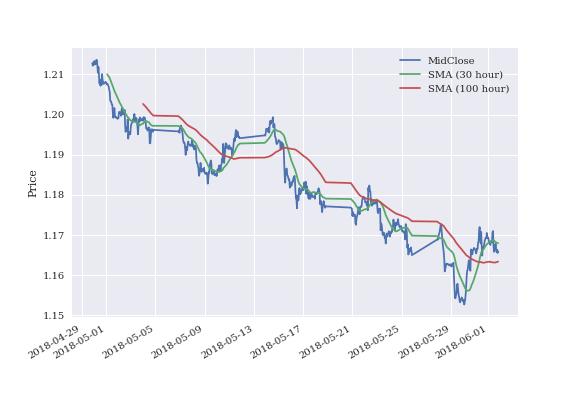

<AxesSubplot:ylabel='Price'>

In [26]:
data[['MidClose', 'SMA (30 hour)', 'SMA (100 hour)']].plot(ylabel="Price")

We can plot this data as a candlestick chart using the mplfinance library. The plots aren't clear with more than a week of hourly data, so we take a subset of times. The plotting function assumes takes a dataframe with Open, High, Low, Close columns, so we split our candle data into bid and ask dataframes and rename the columns before plotting. 

In [27]:
sub = candles.get_data(start="2018-05-01 12:00:00",
                 end="2018-05-08 12:00:00")

In [28]:
def fxcmpyCandles2mplfinanceCandles(data):
    data.columns = [col.lower() for col in data.columns]
    bidData = data[['bidopen', 'bidhigh', 'bidlow', 'bidclose']]
    bidData.columns = ['Open', 'High', 'Low', 'Close']
    askData = data[['askopen', 'askhigh', 'asklow', 'askclose']]
    askData.columns = ['Open', 'High', 'Low', 'Close']
    return bidData, askData

In [29]:
bidData, askData = fxcmpyCandles2mplfinanceCandles(sub)

<IPython.core.display.Javascript object>


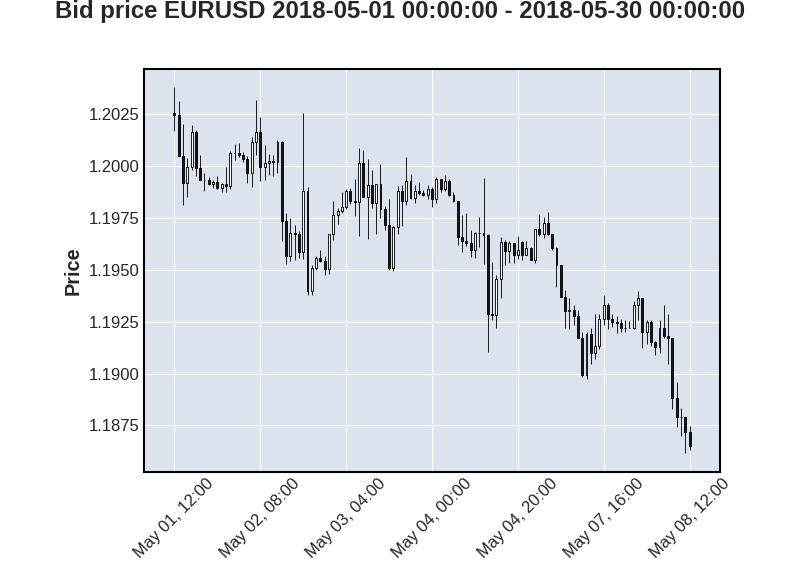

<IPython.core.display.Javascript object>


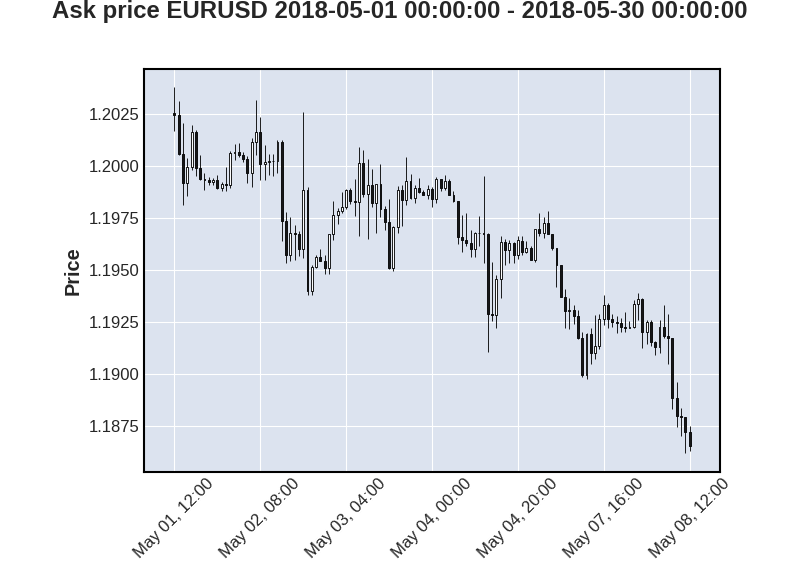

In [30]:
fplt.plot(bidData,
          type='candle',
          title=f'Bid price EURUSD {start} - {stop}',
          ylabel='Price'
         )

fplt.plot(askData,
          type='candle',
          title=f'Ask price EURUSD {start} - {stop}',
          ylabel='Price'
         )

<h3> Working with the API </h3>

In [31]:
gbp_usd_candles = api.get_candles('GBP/USD', period='m1', number=60)

|ERROR|2021-07-24 12:11:32,813|FXCM Server reports an unknown error: {'executed': False, 'error': ''}.
|ERROR|2021-07-24 12:11:32,814|Can not parse server answer to json object: {"response":{"executed":false,"error":""},"instrument_id":"3","period_id":"m1","candles":[]}.


In [32]:
bidData, askData = fxcmpyCandles2mplfinanceCandles(gbp_usd_candles)

In [33]:
fplt.plot(bidData,
          type='candle',
          title=f'Bid price GBPUSD {dt.datetime.now().date()}',
          ylabel='Price'
         )

fplt.plot(askData,
          type='candle',
          title=f'Ask price GBPUSD {dt.datetime.now().date()}',
          ylabel='Price'
         )

<IPython.core.display.Javascript object>

IndexError: index -1 is out of bounds for axis 0 with size 0